In [83]:
print(1)

1


In [38]:
import numpy as np
from math import isnan
import threading as trd
import math
import random as rnd
import copy
    

#def estimate_gaussian(data):
 #   return np.mean(data),np.cov(data)
    
    
def info_gain(data,cov,data_l,cov_l,data_r,cov_r):
    
    a=np.linalg.det(cov)
    if(isnan(a)==True):
        a=0.000000000000000000001
    a=np.log(abs(a))
    
    
    b=np.linalg.det(cov_l)
    if np.isnan(b)==True:
        b=0.000000000000000000001
    #print(data_l.shape[1])
    b=(data_l.shape[0]/data.shape[0]) * np.log(abs(b))
    
    
    c=np.linalg.det(cov_r)
    if np.isnan(c)==True:
        c=0.000000000000000000001
    c=(data_r.shape[0]/data.shape[0]) * np.log(abs(c))
    
    
    print('b: '+str(b) +' shape: '+str(data_l.shape))
    print('c: '+str(c) +' shape: '+str(data_r.shape))
    print('infogain: '+str(a-b-c))
    return a-b-c
    
def split_data(data,split,direction):
#    print('hi')
    left_data=np.array([[0,0]])
    right_data=np.array([[0,0]])
    for d in range(data.shape[0]):
        if data[d][direction]<=split:
            left_data=np.append(left_data,np.reshape(data[d],(1,data[d].shape[0])),axis=0)
        else:
            #print(1,left_data[d].shape[0])
            right_data=np.append(right_data,np.reshape(data[d],(1,data[d].shape[0])),axis=0)
            
   # print(left_data)
    left_data=np.delete(left_data,0,axis=0)
    right_data=np.delete(right_data,0,axis=0)
    return(left_data,right_data)
            

class RandomDensityTree:

    def __init__(self,max_depth=10,num_splits=50,min_infogain=2):
        self.max_depth = max_depth
        #self.root=data
        tree=[]
        for i in range(30):
            tree.append(0)
        self.tree=tree
        self.min_infogain=min_infogain
        self.num_splits=num_splits
        
    def fit(self,data,axis=0):
        if(axis==1):
            data=np.transpose(data)
        self.size=data.shape[0]
        self.root=data
        self.mean = np.mean(data,axis=0)
        self.cov=np.cov(np.transpose(data))
        self.rootnode=Node(data,self.cov,[],self.tree,num_splits=self.num_splits,min_infogain=self.min_infogain,max_depth=self.max_depth,pointer=0)
        self.tree[0]=self.rootnode

    def predict(self,points):
        new=[]
        for p in points:
            new.append(self.rootnode.predict(p))
        new=np.array(new)
        return new
    
    def max_prob():
        leafs=self.leaf_nodes()
        probs=[]
        for l in leafs:
            probs.append(np.det(cov))*math.sqrt(2*math.pi)
        return max(probs)

    def get_means(self):
        means=[]
        self.rootnode.get_means(means)
        return means
    
    def get_split_info(self):
        histories=[]
        self.rootnode.get_split_info(means)
        return histories
   # def maxinfo(self):
    #    np.cov(np.transpose(left_data))
    def leaf_nodes(self):
        leafs=[]
        self.rootnode.leaf_nodes(leafs)
        return np.array(leafs)
    
class Node:
    
    def __init__(self,data,cov,history,tree,num_splits,min_infogain,max_depth,pointer):

        #self.min_infgain=min_infgain
        self.maxdepth=max_depth
        self.min_infogain=min_infogain
        self.pointer=pointer
        self.size=data.shape[0]
        self.tree=tree
        self.num_splits=num_splits
    #    tree[pointer]={''}
        self.split=float('nan')
        self.split_dim=float('nan')
        self.history=copy.deepcopy(history)
        
        self.root=data
        self.mean=np.mean(data,axis=0)
        self.cov=cov
        self.isLeaf=False
        self.left_child=float('nan')
        self.right_child=float('nan')
        if(max_depth==0 or data.shape[0]==1):
            self.isLeaf=True
           
        else:
            
            rnd_splits=[]
            for dim in range(int(num_splits)):
                direction=rnd.choice([0,1])
                rnd_split=rnd.uniform(min(data[:,direction]),max(data[:,direction]))
                rnd_splits.append({'split':rnd_split,'direction':direction})

            left_datas=[]
            info_gains=np.zeros(num_splits)
            right_datas=[]

            covs_left=[]
            covs_right=[]

            for s in range(num_splits):#or the number of random splits
                
                left_data,right_data=split_data(data,rnd_splits[s]['split'],rnd_splits[s]['direction'])
                if(left_data.shape[0]>2 and right_data.shape[0]>2):
                    print('split ' +str(rnd_splits[s]['split'])+'  direction: '+str(rnd_splits[s]['direction']))
                   # left_data=[] #data left of the split
                   # right_data=[] #data right of the split
                    #for a in data:
                     #   if a <= splits[d]:
                      #      if(max_depth=left_data.append(a)
                       # else:
                        #    right_data.append(a)
                    right_data

                    right_datas.append(right_data)
                    left_datas.append(left_data)

                    cov_l=np.cov(np.transpose(left_data))
                    cov_r=np.cov(np.transpose(right_data))

                    covs_left.append(cov_l)
                    covs_right.append(cov_r)
                 #   print(left_data)
                    info_gains[s]=(info_gain(data,self.cov,left_data,cov_l,right_data,cov_r)) #entropies of left and right data)
                else:
                    right_datas.append(float('nan'))
                    left_datas.append(float('nan'))
                    covs_left.append(float('nan'))
                    covs_right.append(float('nan'))
                    #information gain if this split is used
            if len(info_gains)==0:
                self.isLeaf=True
                   
            else:

                best=np.argmax(info_gains)
                print('best infogain: '+str(info_gains[best]))
                print(min_infogain)
                if info_gains[best] >= min_infogain:
             
                    self.split=rnd_splits[best]['split']   #best split
                    self.split_dim=rnd_splits[best]['direction'] 
                    #print(('ahoy-hoy',len(right_datas)))
                   # print(len(right_datas))
                   # print(('ahoy-hoy','history:',len(rnd_splits)))
                    self.history.append(rnd_splits[best])
                    if(2*pointer+2>=len(tree)):
                        for i in range((2*pointer+2)-len(tree)+1):
                            tree.append(0)
                   # print(left_datas[best].shape)
                    #print(right_datas[best].shape)
                    #print((left_datas[best],covs_left[best],history,tree,self.num_splits,self.min_infogain,self.maxdepth-1,2*pointer+1))
                    self.history[len(self.history)-1]['child']='left'
                    leftnode=Node(left_datas[best],covs_left[best],self.history,tree,self.num_splits,self.min_infogain,self.maxdepth-1,2*pointer+1)
                    tree[2*pointer+1]=leftnode
                    self.left_child=leftnode
            
                   # print(len(right_datas[best],covs_right[best],history,self.num_splits,self.min_infogain,s2))
                    
                    self.history[len(self.history)-1]['child']='right'
                    rightnode=Node(right_datas[best],covs_right[best],self.history,tree,self.num_splits,self.min_infogain,self.maxdepth-1,2*pointer+2)
                    tree[2*pointer+2]=rightnode
                    self.right_child=rightnode
                    
                else:
         
                    self.isLeaf=True
        print((self.isLeaf,self.left_child))
    def predict(self,point):
        if self.isLeaf==True:
            return self.pointer
        else:
            if point[self.split_dim]<=self.split:
                return self.left_child.predict(point)
            else:
                return self.right_child.predict(point)
    '''         
     def get_split_info(self,histories):
        if(self.isLeaf==True):
            return self.history
            print('whoa')
        else:
            return [{'split':self.split,'split_dim':self.split_dim,},{'left_child':self.left_child.get_results()},{'right_child':self.right_child.get_results()}]
    '''
    def get_split_info(self,histories):
        if(self.isLeaf==True):
            histories.append(self.history)
        else:
            self.left_child.get_histories(histories)
            self.right_child.get_histories(histories)

    def get_means(self,means):
        if(self.isLeaf==True):
            means.append(self.mean)
        else:
            self.left_child.get_means(means)
            self.right_child.get_means(means)
            
    def maxprob():
        return 1
    
    def leaf_nodes(self,leafs):
      #  if self.left_child.isLeaf == True:
       #     leafs.append(self.left_child.pointer)
        if(self.isLeaf==True):
            leafs.append(self.pointer)
        else:
            self.left_child.leaf_nodes(leafs)
      #  if self.right_child.isLeaf == True:
       #     leafs.append(self.right_child)
        #else:
            self.right_child.leaf_nodes(leafs)
        
    def isnan(self):
        return False
    
def partition_function(tree, x):
    # generate a lot of samples in the bounds of the data and the size of the bounded shape
    samples, b_size = generate_monte_carlo_sample(x)
    # add gaussian probability dimension for those samples
    g_probs_samples = np.random.random(len(samples))*tree.max_prob
    b_size = b_size*tree.max_prob
    # predict the target leb af nodes for all samples
    leaf_node_ids = tree.predict(samples)
    # compute the distribution integral over each leaf node
    g_ints = np.zeros((len(tree.leaf_nodes),))
    for ln_id in range(len(tree.leaf_nodes)):
        leaf_node = tree.leaf_nodes[ln_id]
        mean_vec = leaf_node.mean
        cov_mat = leaf_node.cov
        mnd = stats.multivariate_normal(mean_vec, cov_mat)
        sample_id_mask = leaf_node_ids==ln_id
        g_probs = mnd(samples[sample_id_mask])
        g_cnt = np.sum(g_probs_samples<=g_probs)
        g_ints[ln_id] = g_cnt/len(samples)*b_size
    


def generate_monte_carlo_sample(X, num_samples=1000000):
    """
    Generate more sample points
    """
    samples = np.random.rand(num_samples,len(X[0]))
    d_mins = np.min(X,axis=0)
    d_maxs = np.max(X,axis=0)
    samples = np.add(np.multiply(samples,d_maxs-d_mins),d_mins)
    b_size = np.prod(d_maxs-d_mins)
    return samples, b_size    
'''
class RandomDensityForest:
    def _init(self,max_length=10,num_trees=10):
        self.max_length=max_length
        self.num_trees=num_trees
        
    def train_and_stuff(data):
        #lauch DensityTrees
        #train on data
        #return results
        #use partition function
        #combine them into final result
    
    I= entropy - sum
theta= max(I)    
'''

'\nclass RandomDensityForest:\n    def _init(self,max_length=10,num_trees=10):\n        self.max_length=max_length\n        self.num_trees=num_trees\n        \n    def train_and_stuff(data):\n        #lauch DensityTrees\n        #train on data\n        #return results\n        #use partition function\n        #combine them into final result\n    \n    I= entropy - sum\ntheta= max(I)    \n'

In [33]:
import numpy as np
print(DensityTree.get_means())

[array([ 2.05841503,  2.06321624]), array([ 5.03663098,  0.87954265]), array([ 0.96257205,  4.60034381]), array([ 0.65848779,  5.38033305]), array([ 1.93028167,  5.32164957]), array([ 5.02506548,  4.98309083])]


In [34]:
print(data.shape)
print(np.transpose(data))

(100, 2)
[[ 1.03754758  1.59824847  2.1094747   1.72474419  2.60194843  1.66887751
   2.30300722  2.13949212  2.23919738  3.02216989  1.41400904  1.52764539
   2.25428669  1.57872018  2.24928277  1.98478355  1.61697816  2.2378951
   2.13131992  2.42739006  1.57987549  2.6174872   2.22615305  1.9327085
   2.24214422  1.96694538  1.68309953  1.82213385  1.74698534  2.61205976
   4.38325036  5.46426579  4.77346388  5.10730759  4.31582577  5.51430176
   4.68832277  5.23180012  4.98181384  5.19559707  3.98617335  5.3916823
   5.56200171  5.15216081  4.54216899  5.28040938  4.93992198  5.53074282
   5.27417027  5.07325563  5.25024567  5.04646415  4.68361286  5.45586867
   4.77003518  5.44930709  5.0263038   4.11747432  5.67781836  4.88619818
   4.85483572  5.44570126  4.25431411  5.10341994  4.5558685   5.90372469
   4.87667182  4.53749919  4.90154359  4.75546725  5.47857912  5.72373977
   4.91428181  5.12806875  4.9654399   3.51425534  4.86135439  4.97855688
   4.42076619  4.6130944   4.907

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
#

data = np.zeros([100,2])
for i in range(30):
    data[i]=np.random.normal([2,2],0.5)
   # data[i][0]=np.random.normal(2,0.5)[0]
    #data[i][1]=np.random.normal(2)[1]
for i in range(30):
    data[30+i]=np.random.normal([5,5],0.5)
    #data[30+i][1]=np.random.normal(5,0.5) 
for i in range(30):
    data[60+i]=np.random.normal([5,1],0.5)
   
for i in range(10):
    data[90+i]=np.random.normal([1,5],0.5)


DensityTree=RandomDensityTree()
DensityTree.fit(data)

split 2.42047141698  direction: 1
b: -0.488613305272 shape: (55, 2)
c: 0.479826895239 shape: (45, 2)
infogain: 2.38220264361
split 5.24304736936  direction: 1
b: 1.58339786968 shape: (83, 2)
c: -0.300718332427 shape: (17, 2)
infogain: 1.09073669633
split 5.92207882495  direction: 0
b: 2.23702783228 shape: (97, 2)
c: -0.0946153272173 shape: (3, 2)
infogain: 0.231003728515
split 3.55666791729  direction: 1
b: -0.440278953999 shape: (60, 2)
c: -0.0253312898874 shape: (40, 2)
infogain: 2.83902647747
split 3.09820906417  direction: 0
b: -0.314293811132 shape: (40, 2)
c: 0.181118409758 shape: (60, 2)
infogain: 2.50659163495
split 5.26638281103  direction: 1
b: 1.62821590847 shape: (84, 2)
c: -0.310482860121 shape: (16, 2)
infogain: 1.05568318523
split 2.46269194156  direction: 1
b: -0.484685508106 shape: (56, 2)
c: 0.414342882279 shape: (44, 2)
infogain: 2.44375885941
split 1.04612644447  direction: 1
b: -0.799000545722 shape: (19, 2)
c: 1.71462321814 shape: (81, 2)
infogain: 1.45779356116
s

In [15]:

DensityTree2=RandomDensityTree()
DensityTree2.fit(data)
DensityTree2.predict([[2,3],[4,5]])

split 5.53423665621  direction: 1
b: 2.05118881301 shape: (95, 2)
c: -0.321939819339 shape: (5, 2)
infogain: 0.50063408878
split 5.7596588568  direction: 0
b: 2.00215524874 shape: (94, 2)
c: -0.0976328802307 shape: (6, 2)
infogain: 0.325360713945
split 5.19100636775  direction: 1
b: 1.84710545154 shape: (89, 2)
c: -0.316812776881 shape: (11, 2)
infogain: 0.699590407793
split 3.15389834134  direction: 1
b: -0.37438966292 shape: (60, 2)
c: -0.102259990384 shape: (40, 2)
infogain: 2.70653273576
split 3.30322126121  direction: 1
b: -0.37438966292 shape: (60, 2)
c: -0.102259990384 shape: (40, 2)
infogain: 2.70653273576
split 3.68865138458  direction: 0
b: -0.286476733288 shape: (40, 2)
c: 0.163394275168 shape: (60, 2)
infogain: 2.35296554057
split 1.6904831924  direction: 1
b: -0.596644137492 shape: (35, 2)
c: 0.866090246247 shape: (65, 2)
infogain: 1.9604369737
split 5.05164314069  direction: 1
b: 1.63183654743 shape: (84, 2)
c: -0.352546249868 shape: (16, 2)
infogain: 0.950592784886
split

array([6, 3])

In [16]:
print(partition_function(tree,100))

TypeError: 'int' object is not subscriptable

[{'split': 3.5566679172879487, 'direction': 1, 'child': 'left'}, {'split': 2.7779314756381051, 'direction': 0, 'child': 'left'}]
(30, 2)
[{'split': 3.5566679172879487, 'direction': 1, 'child': 'left'}, {'split': 2.7779314756381051, 'direction': 0, 'child': 'right'}]
(30, 2)
[{'split': 3.5566679172879487, 'direction': 1, 'child': 'right'}, {'split': 2.3672310217256358, 'direction': 0, 'child': 'left'}, {'split': 5.2579965677281368, 'direction': 1, 'child': 'left'}]
(7, 2)
[{'split': 3.5566679172879487, 'direction': 1, 'child': 'right'}, {'split': 2.3672310217256358, 'direction': 0, 'child': 'left'}, {'split': 5.2579965677281368, 'direction': 1, 'child': 'right'}]
(3, 2)
[{'split': 3.5566679172879487, 'direction': 1, 'child': 'right'}, {'split': 2.3672310217256358, 'direction': 0, 'child': 'right'}]
(30, 2)


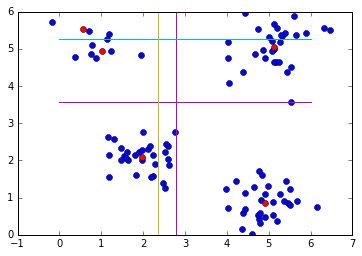

In [43]:
nodes=DensityTree.leaf_nodes()
tree=DensityTree.tree
plt.plot(data[:,0],data[:,1], "o")
for d in nodes:
    print(tree[d].history)
    for h in tree[d].history:
        if h['direction']==0:
            plt.plot([h['split'],h['split']],[0,6])
        else:
            plt.plot([0,6],[h['split'],h['split']])
            
    print(tree[d].root.shape)
    plt.plot(tree[d].mean[0],tree[d].mean[1],'o',color='r')
 #   lines=d.history
  #  if lines['direction']==0:
   #     plot
   # plt.savefig('results')
    
#plt.plot([3.4611913424559244,3.4611913424559244],[0,6])
#plt.plot([0,6],[ 4.0724581571601854, 4.0724581571601854])
#plt.plot([0,6],[ 2.2392637110032361, 2.2392637110032361])
#plt.plot([0,6],[ 2.6017827096744832,  2.6017827096744832])

#plt.plot([0,6],[4.3153900996135484,  4.3153900996135484])

#plt.plot([0,6],[ 3.3000801823937387, 3.3000801823937387])

#plt.plot( 0.86719180226239123, 'direction': 0)
#plt.plot([2.0024517583718917,2.0024517583718917],[-1,6])
#plt.plot([0.9883004157571309,0.9883004157571309],[-1,6])


#plt.plot( 4.64157772,  0.63988413,"o")
#plt.plot( 3.03334449,  2.46542821,"o")
#plt.plot( 4.24936537,  5.14213751,"o")
#plt.plot( 3.23164995,  5.9834305 ,"o")

[{'split': 3.245427000841719, 'direction': 1, 'child': 'left'}, {'split': 1.1241675743225339, 'direction': 1, 'child': 'left'}]
(23, 2)
[{'split': 3.245427000841719, 'direction': 1, 'child': 'left'}, {'split': 1.1241675743225339, 'direction': 1, 'child': 'right'}]
(37, 2)
[{'split': 3.245427000841719, 'direction': 1, 'child': 'right'}, {'split': 5.3848845245890073, 'direction': 1, 'child': 'left'}, {'split': 0.86719180226239123, 'direction': 0, 'child': 'left'}]
(3, 2)
[{'split': 3.245427000841719, 'direction': 1, 'child': 'right'}, {'split': 5.3848845245890073, 'direction': 1, 'child': 'left'}, {'split': 0.86719180226239123, 'direction': 0, 'child': 'right'}, {'split': 5.7306771060727044, 'direction': 1, 'child': 'left'}]
(3, 2)
[{'split': 3.245427000841719, 'direction': 1, 'child': 'right'}, {'split': 5.3848845245890073, 'direction': 1, 'child': 'left'}, {'split': 0.86719180226239123, 'direction': 0, 'child': 'right'}, {'split': 5.7306771060727044, 'direction': 1, 'child': 'right'}]


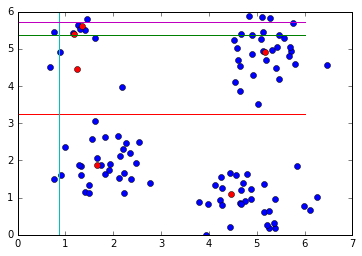

In [194]:
nodes=DensityTree.leaf_nodes()
plt.plot(data[:,0],data[:,1], "o")
for d in nodes:
    print(d.history)
    print(d.root.shape)
    plt.plot(d.mean[0],d.mean[1],'o',color='r')
    lines=d.history
    if lines['direction']==0:
        plot
    plt.savefig('results')
plt.plot([0,6],[5.358583094356550,5.358583094356550])
#plt.plot([0,6],[ 4.0724581571601854, 4.0724581571601854])
plt.plot([0,6],[  3.245427000841719,  3.245427000841719])
plt.plot([  0.86719180226239123,  0.86719180226239123],[0,6])
plt.plot([0,6],[ 5.7306771060727044,  5.7306771060727044])
#plt.plot( 0.86719180226239123, 'direction': 0)
#plt.plot([2.0024517583718917,2.0024517583718917],[-1,6])
#plt.plot([0.9883004157571309,0.9883004157571309],[-1,6])


#plt.plot( 4.64157772,  0.63988413,"o")
#plt.plot( 3.03334449,  2.46542821,"o")
#plt.plot( 4.24936537,  5.14213751,"o")
#plt.plot( 3.23164995,  5.9834305 ,"o")

In [181]:
data2 = np.zeros([100,2])
for i in range(100):
    data2[i]=np.random.normal([2,2],1)
    
print(np.linalg.det(np.cov(np.transpose(data2))))

0.986957740915


In [19]:
print(np.log(-1))

nan


c:\program files\python35\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
